In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key
import time
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

609

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7e7be67db680e55c0875ab935aeb6f92


In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | bougouni
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | atar
Processing Record 5 of Set 1 | kota tinggi
Processing Record 6 of Set 1 | hirara
Processing Record 7 of Set 1 | kotma
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 1 | dukat
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | atambua
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | waingapu
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | siemiatycze
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Se

Processing Record 37 of Set 4 | hofn
Processing Record 38 of Set 4 | roma
Processing Record 39 of Set 4 | narsaq
Processing Record 40 of Set 4 | macae
Processing Record 41 of Set 4 | ostrovnoy
Processing Record 42 of Set 4 | crab hill
City not found. Skipping...
Processing Record 43 of Set 4 | iqaluit
Processing Record 44 of Set 4 | weiser
Processing Record 45 of Set 4 | portland
Processing Record 46 of Set 4 | gaoua
Processing Record 47 of Set 4 | hailey
Processing Record 48 of Set 4 | rafraf
Processing Record 49 of Set 4 | tamboril
Processing Record 50 of Set 4 | luderitz
Processing Record 1 of Set 5 | hasaki
Processing Record 2 of Set 5 | dongsheng
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | lebedinyy
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | touros
Processing Record 7 of Set 5 | kang
Processing Record 8 of Set 5 | vestmanna
Processing Record 9 of Set 5 | aksu
Processing Record 10 of Set 5 | dunedin
Processing Record 11 of Set 5 

Processing Record 31 of Set 8 | canandaigua
Processing Record 32 of Set 8 | port augusta
Processing Record 33 of Set 8 | njombe
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | arraial do cabo
Processing Record 36 of Set 8 | jardim
Processing Record 37 of Set 8 | ixtapa
Processing Record 38 of Set 8 | acajutla
Processing Record 39 of Set 8 | mayumba
Processing Record 40 of Set 8 | marsh harbour
Processing Record 41 of Set 8 | rio gallegos
Processing Record 42 of Set 8 | aflu
City not found. Skipping...
Processing Record 43 of Set 8 | saint-pierre
Processing Record 44 of Set 8 | saint anthony
Processing Record 45 of Set 8 | vakhrushev
Processing Record 46 of Set 8 | porto santo
Processing Record 47 of Set 8 | codrington
Processing Record 48 of Set 8 | lesnoye
Processing Record 49 of Set 8 | kununurra
Processing Record 50 of Set 8 | pochutla
Processing Record 1 of Set 9 | dubbo
Processing Record 2 of Set 9 | kenai
Processing Record 3 of Set 9 | motala
Processing Re

City not found. Skipping...
Processing Record 18 of Set 12 | san cristobal
Processing Record 19 of Set 12 | mareeba
Processing Record 20 of Set 12 | bitung
Processing Record 21 of Set 12 | quatre cocos
Processing Record 22 of Set 12 | virginia beach
Processing Record 23 of Set 12 | pangkalanbuun
Processing Record 24 of Set 12 | zhigansk
Processing Record 25 of Set 12 | husavik
Processing Record 26 of Set 12 | mongo
Processing Record 27 of Set 12 | lusambo
Processing Record 28 of Set 12 | gat
Processing Record 29 of Set 12 | sirpur
Processing Record 30 of Set 12 | mergui
City not found. Skipping...
Processing Record 31 of Set 12 | semirom
Processing Record 32 of Set 12 | tilichiki
Processing Record 33 of Set 12 | kijang
Processing Record 34 of Set 12 | raudeberg
Processing Record 35 of Set 12 | port lincoln
Processing Record 36 of Set 12 | pangody
Processing Record 37 of Set 12 | kolchugino
Processing Record 38 of Set 12 | palmer
Processing Record 39 of Set 12 | sovetskiy
Processing Rec

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,37.40,40,1,3.04,US,2020-02-24 01:05:03
1,Bougouni,11.42,-7.48,77.41,17,60,2.59,ML,2020-02-24 01:07:15
2,Butaritari,3.07,172.79,85.03,76,68,16.37,KI,2020-02-24 01:07:15
3,Atar,20.52,-13.05,82.81,15,100,10.38,MR,2020-02-24 01:07:15
4,Kota Tinggi,1.74,103.90,82.00,83,75,4.70,MY,2020-02-24 01:07:15
5,Hirara,24.80,125.28,69.80,68,75,6.93,JP,2020-02-24 01:07:15
6,Kotma,23.20,81.97,60.49,91,2,2.48,IN,2020-02-24 01:07:16
7,Georgetown,5.41,100.34,80.60,69,20,4.70,MY,2020-02-24 01:07:16
8,Sao Joao Da Barra,-21.64,-41.05,75.20,73,100,7.14,BR,2020-02-24 01:07:16
9,Lebu,-37.62,-73.65,56.97,80,6,6.58,CL,2020-02-24 01:07:16


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-02-24 01:05:03,42.60,-73.97,37.40,40,1,3.04
1,Bougouni,ML,2020-02-24 01:07:15,11.42,-7.48,77.41,17,60,2.59
2,Butaritari,KI,2020-02-24 01:07:15,3.07,172.79,85.03,76,68,16.37
3,Atar,MR,2020-02-24 01:07:15,20.52,-13.05,82.81,15,100,10.38
4,Kota Tinggi,MY,2020-02-24 01:07:15,1.74,103.90,82.00,83,75,4.70


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

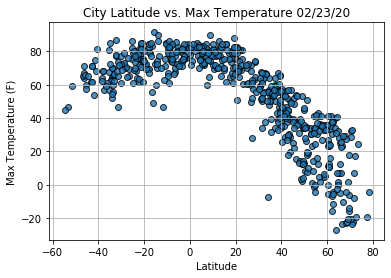

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

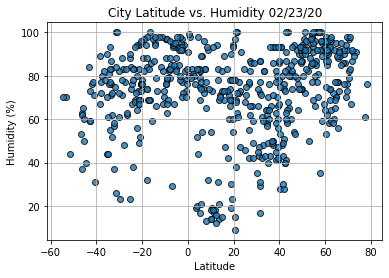

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

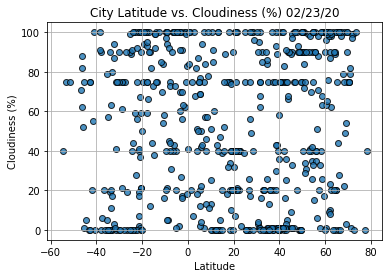

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

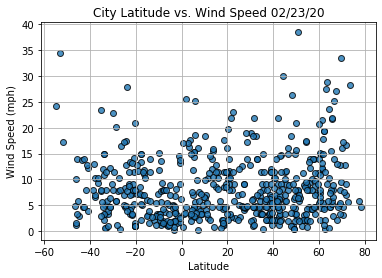

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [39]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(label=title)
    plt.show()

In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

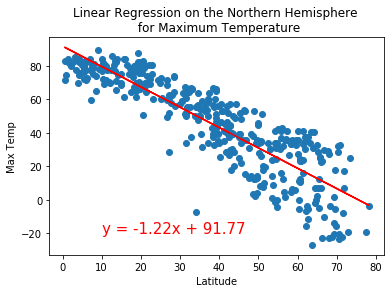

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,-20))

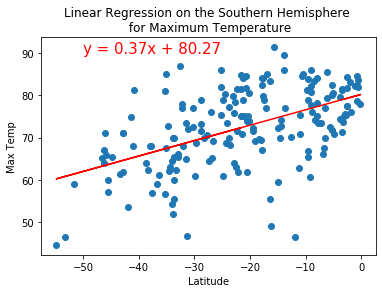

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

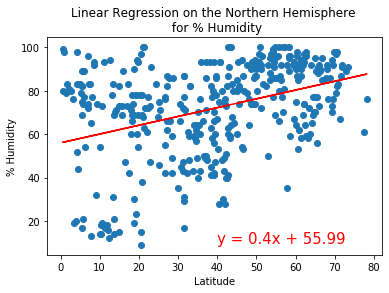

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

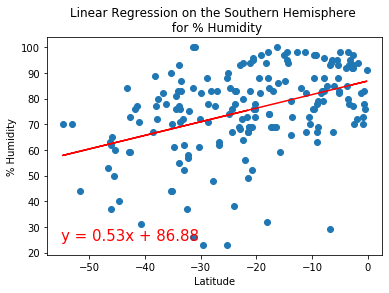

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,25))

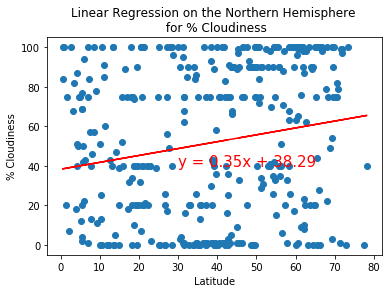

In [50]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,40))

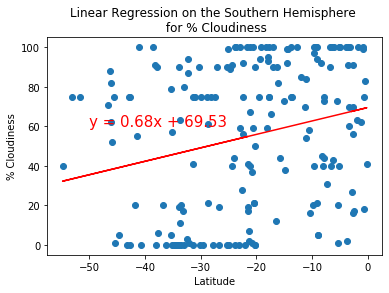

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

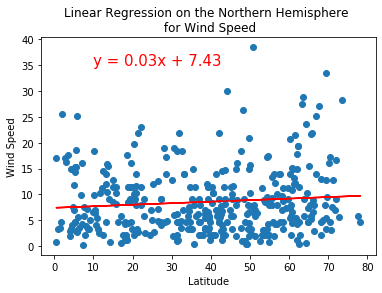

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,35))